# Weekly assignment 2: Task 1

This task follows closely the second part of week 3 lecture (Introduction to Data Manipulation and Plotting in Python). Read along and complete the missing code parts, including in places market with @@@.

#### Read csv the data into a dataframe

* The data come from ['The Economic Guide to Picking a College Major'](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/), Fivethirtyeight magazine

In [25]:
import pandas as pd
from pandas import Series, DataFrame

majors = pd.read_csv('recent-grads.csv')
majors.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


#### Generate the following matplotlib plots:
- Share of women vs. median salary
- Unemployment rate vs. median salary
- Unemployment rate vs. share of women
- Median salary vs. total participation
- Share of women vs. total participation

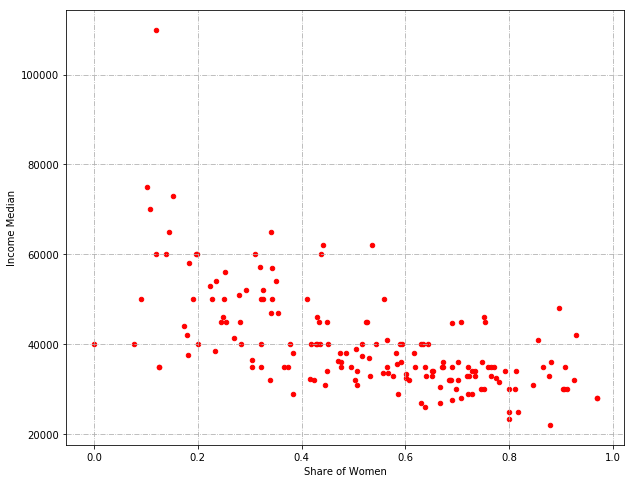

In [16]:
import matplotlib.pyplot as plt
import numpy as np

majors.plot(x='ShareWomen', y='Median', kind='scatter',figsize=(10,8), color='red')
plt.xlabel('Share of Women')
plt.ylabel('Income Median')
plt.grid('on',ls='-.')
plt.show()

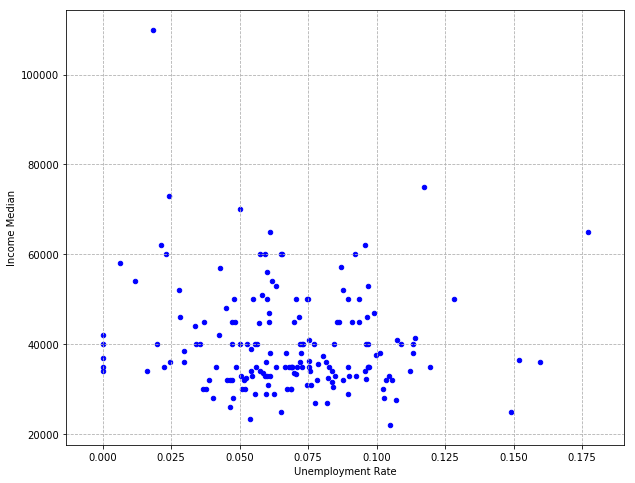

In [9]:
majors.plot(x='Unemployment_rate', y='Median', kind='scatter', figsize=(10,8),c='b')
plt.xlabel('Unemployment Rate')
plt.ylabel('Income Median')
plt.grid('on', ls='--')
plt.show()

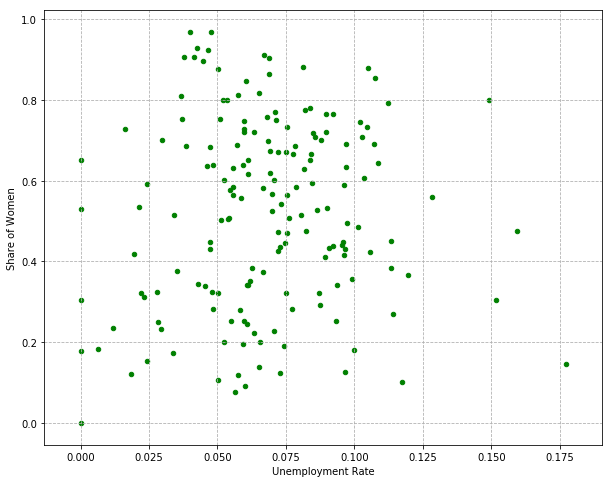

In [11]:
majors.plot(x='Unemployment_rate', y='ShareWomen', kind='scatter', figsize=(10,8),c='g')
plt.xlabel('Unemployment Rate')
plt.ylabel('Share of Women')
plt.grid('on', ls='--')
plt.show()

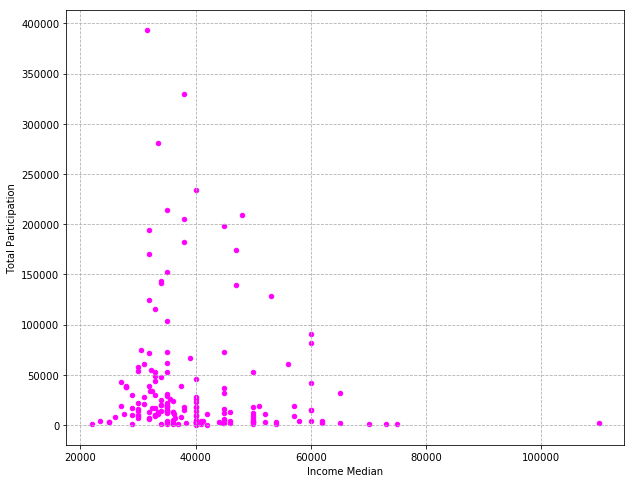

In [14]:
majors.plot(x='Median', y='Total', kind='scatter', figsize=(10,8),c='magenta')
plt.xlabel('Income Median')
plt.ylabel('Total Participation')
plt.grid('on', ls='--')
plt.show()

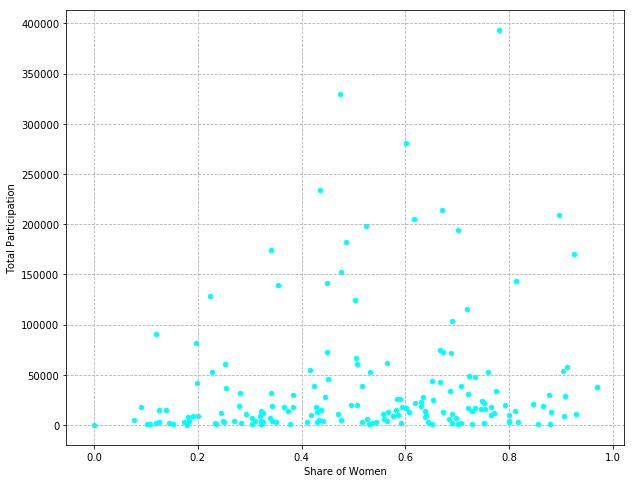

In [13]:
majors.plot(x='ShareWomen', y='Total', kind='scatter', figsize=(10,8),c='cyan')
plt.xlabel('Share of Women')
plt.ylabel('Total Participation')
plt.grid('on', ls='--')
plt.show()

#### Find the mean number of full-time and part-time workers across majors

In [18]:
print(majors.pivot_table(values='Full_time', index='Major',aggfunc=np.mean))
print('-'*100)
print(majors.pivot_table(values='Part_time', index='Major',aggfunc=np.mean))

                                               Full_time
Major                                                   
ACCOUNTING                                        151967
ACTUARIAL SCIENCE                                   2924
ADVERTISING AND PUBLIC RELATIONS                   38815
AEROSPACE ENGINEERING                              11106
AGRICULTURAL ECONOMICS                              1819
AGRICULTURE PRODUCTION AND MANAGEMENT              11119
ANIMAL SCIENCES                                    14479
ANTHROPOLOGY AND ARCHEOLOGY                        20147
APPLIED MATHEMATICS                                 3465
ARCHITECTURAL ENGINEERING                           2277
ARCHITECTURE                                       29223
AREA ETHNIC AND CIVILIZATION STUDIES               18755
ART AND MUSIC EDUCATION                            23018
ART HISTORY AND CRITICISM                          13262
ASTRONOMY AND ASTROPHYSICS                          1085
ATMOSPHERIC SCIENCES AND METEOR

#### Find the median number of people in low wage jobs

In [23]:
print(majors.Low_wage_jobs.median())
print(majors['Low_wage_jobs'].median())
print(majors['Low_wage_jobs'].median(axis=0))

1231.0
1231.0
1231.0


#### Create a table of summary statistics for the unemployment and employment rates

In [28]:
print(majors['Unemployment_rate'].describe())
majors['Employment_rate']=Series(1-majors['Unemployment_rate'].values,majors.index)
majors['Employment_rate2']=1-majors['Unemployment_rate']
print(majors['Employment_rate'].describe())
print(majors['Employment_rate2'].describe())

count    173.000000
mean       0.068191
std        0.030331
min        0.000000
25%        0.050306
50%        0.067961
75%        0.087557
max        0.177226
Name: Unemployment_rate, dtype: float64
count    173.000000
mean       0.931809
std        0.030331
min        0.822774
25%        0.912443
50%        0.932039
75%        0.949694
max        1.000000
Name: Employment_rate, dtype: float64
count    173.000000
mean       0.931809
std        0.030331
min        0.822774
25%        0.912443
50%        0.932039
75%        0.949694
max        1.000000
Name: Employment_rate2, dtype: float64


#### Create a table of summary statistics for major's categories

In [31]:
print(majors['Major_category'].describe())
print('-'*100)
print(majors.pivot_table(values='Median',index='Major_category',aggfunc='count',margins=True).astype(int))

count             173
unique             16
top       Engineering
freq               29
Name: Major_category, dtype: object
----------------------------------------------------------------------------------------------------
                                     Median
Major_category                             
Agriculture & Natural Resources          10
Arts                                      8
Biology & Life Science                   14
Business                                 13
Communications & Journalism               4
Computers & Mathematics                  11
Education                                16
Engineering                              29
Health                                   12
Humanities & Liberal Arts                15
Industrial Arts & Consumer Services       7
Interdisciplinary                         1
Law & Public Policy                       5
Physical Sciences                        10
Psychology & Social Work                  9
Social Science             

#### Create a new variable equal to the proportion of workers who are part time

In [33]:
majors['proportion_part_time']=Series(majors['Part_time']/majors['Total'],majors.index)
majors.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Employment_rate,Employment_rate2,proportion_part_time
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,0.018381,110000,95000,125000,1534,364,193,0.981619,0.981619,0.115434
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,0.117241,75000,55000,90000,350,257,50,0.882759,0.882759,0.224868
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,0.024096,73000,50000,105000,456,176,0,0.975904,0.975904,0.155374
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,0.050125,70000,43000,80000,529,102,0,0.949875,0.949875,0.119237
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,0.061098,65000,50000,75000,18314,4440,972,0.938902,0.938902,0.160570


#### Plot the part time rate against the share of women

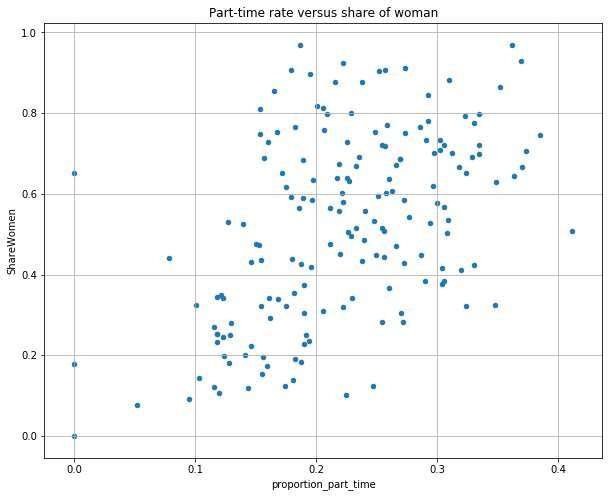

In [37]:
majors.plot(x='proportion_part_time',y='ShareWomen',kind='scatter',grid=1,legend=1,
            title='Part-time rate versus share of woman',figsize=(10,8))
plt.show()

#### How many college majors in the sample have a median salary above $50,000?
* Hint: use `len()` to find the length of a dataframe

In [44]:
M1 = 50000
M2 = majors['Median'].max(axis=0)
median_cut = pd.cut(majors['Median'],[0,M1,M2])
majors.pivot_table(values='Median',columns=median_cut,aggfunc='count')

Median,"(0, 50000]","(50000, 110000]"
Median,148,25


#### How many Business majors have a median salary above $50,000?

In [45]:
majors.pivot_table(values='Median',index='Major_category',columns=median_cut,aggfunc='count')

Median,"(0, 50000]","(50000, 110000]"
Major_category,,
Agriculture & Natural Resources,9.0,1.0
Arts,8.0,NaN
Biology & Life Science,14.0,NaN
Business,11.0,2.0
Communications & Journalism,4.0,NaN
Computers & Mathematics,10.0,1.0
Education,16.0,NaN
Engineering,10.0,19.0
Health,12.0,NaN


#### Of all Business majors, which has the highest median salary?

In [46]:
majors[majors['Major_category']=='Business'][['Major','Median']]

,Major,Median
6,ACTUARIAL SCIENCE,62000
24,MANAGEMENT INFORMATION SYSTEMS AND STATISTICS,51000
27,OPERATIONS LOGISTICS AND E-COMMERCE,50000
35,FINANCE,47000
37,BUSINESS ECONOMICS,46000
40,ACCOUNTING,45000
57,GENERAL BUSINESS,40000
59,INTERNATIONAL BUSINESS,40000
62,MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION,40000
76,BUSINESS MANAGEMENT AND ADMINISTRATION,38000


#### Return the mean of the share of women for each major category and sort from highest to lowest, plot the result as a bar plot

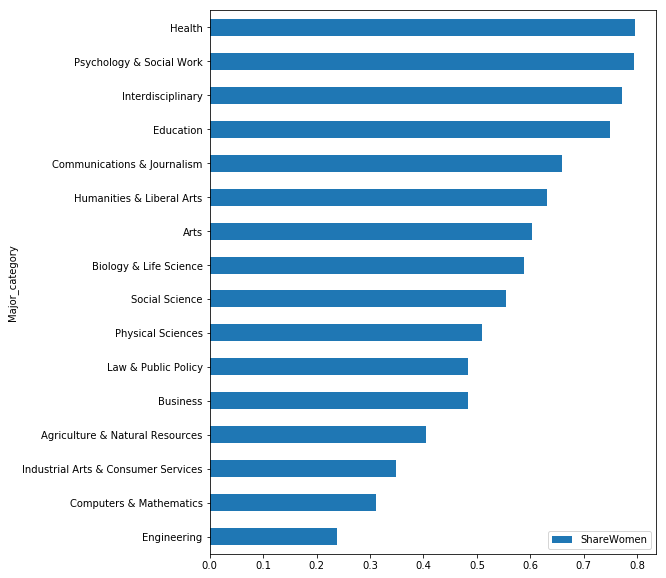

In [48]:
df2= majors.pivot_table(values='ShareWomen',index='Major_category',aggfunc='mean')
df2=df2.sort_values(by='ShareWomen')
df2.plot(y='ShareWomen',kind='barh',figsize=(8,10))
plt.show()